In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

response = requests.get(url)

data = StringIO(response.text)
df = pd.read_csv(data)

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=col_names)

df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [95]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [96]:
X = df.drop('class', axis=1)

le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col])

In [97]:
df['class'] = pd.Categorical(df['class'])
Y = pd.get_dummies(df['class'])

In [98]:
X = X.values
Y = Y.values

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test)

(1382, 6) (1382, 4)
(346, 6) [[False False  True False]
 [False False  True False]
 [False False  True False]
 ...
 [ True False False False]
 [False False  True False]
 [ True False False False]]


In [101]:
model = Sequential()
model.add(Dense(20, input_shape=(6,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model_history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4515 - loss: 1.1203 - val_accuracy: 0.6936 - val_loss: 0.8865
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7258 - loss: 0.8085 - val_accuracy: 0.6994 - val_loss: 0.8387
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6980 - loss: 0.8189 - val_accuracy: 0.7052 - val_loss: 0.8058
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7074 - loss: 0.7741 - val_accuracy: 0.7139 - val_loss: 0.7776
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7345 - loss: 0.7182 - val_accuracy: 0.7139 - val_loss: 0.7565
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7279 - loss: 0.7424 - val_accuracy: 0.7197 - val_loss: 0.7384
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7499 - loss: 0.6978 - val_accuracy: 0.7312 - val_loss: 0.7195
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7266 - loss: 0.7150 - val_accuracy: 0.7283 - val_loss:

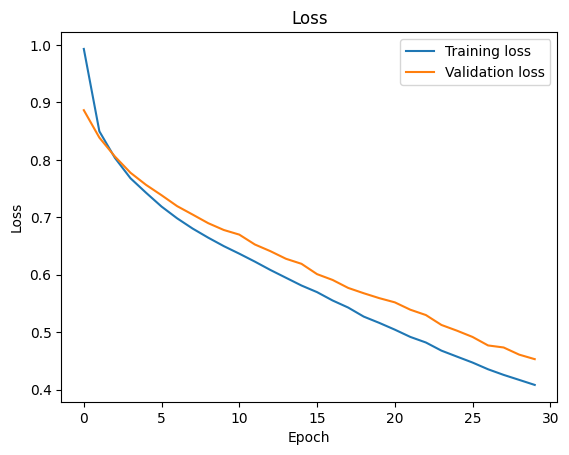

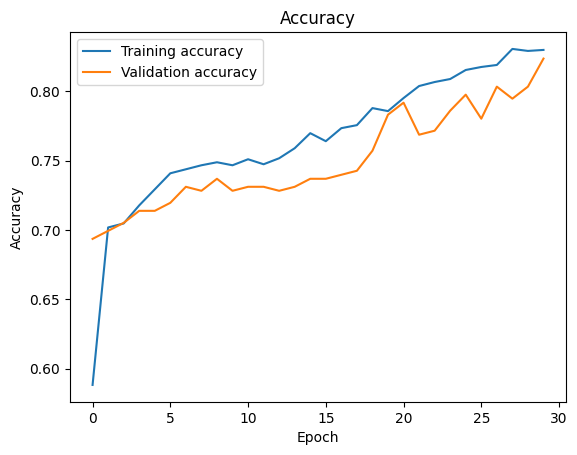

In [102]:
#Loss graph
plt.plot(model_history.history['loss'], label='Training loss')
plt.plot(model_history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Loss graph
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [103]:
Y_pred = model.predict(X_test)

Y_test_class = np.argmax(Y_test, axis=1)

Y_pred_class = np.argmax(Y_pred, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [104]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test_class, Y_pred_class))
print(confusion_matrix(Y_test_class, Y_pred_class))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66        79
           1       0.00      0.00      0.00        17
           2       0.92      0.93      0.92       240
           3       0.67      0.40      0.50        10

    accuracy                           0.82       346
   macro avg       0.55      0.52      0.52       346
weighted avg       0.79      0.82      0.81       346

[[ 58   0  20   1]
 [ 17   0   0   0]
 [ 16   0 223   1]
 [  6   0   0   4]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
